# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


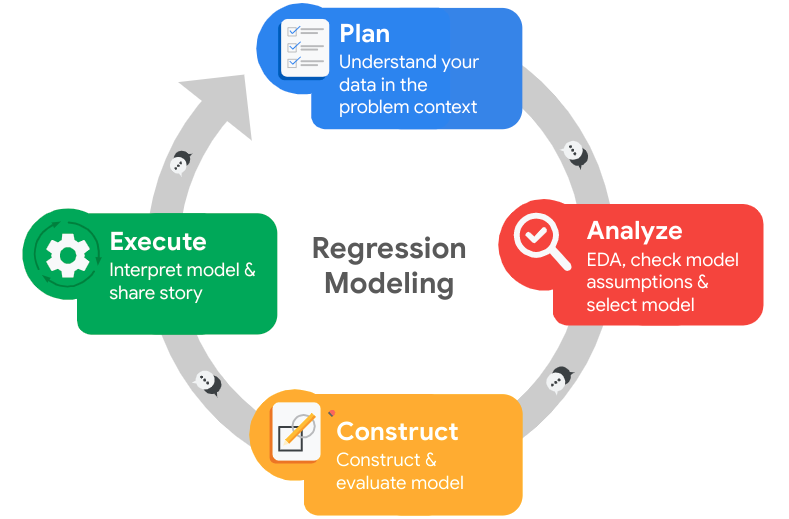

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'average_montly_hours':'average_monthly_hours', 'time_spend_company':'time_spent_company',
                   'Work_accident':'work_accident', 'Department':'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spent_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.duplicated(keep=False).sum()

5346

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

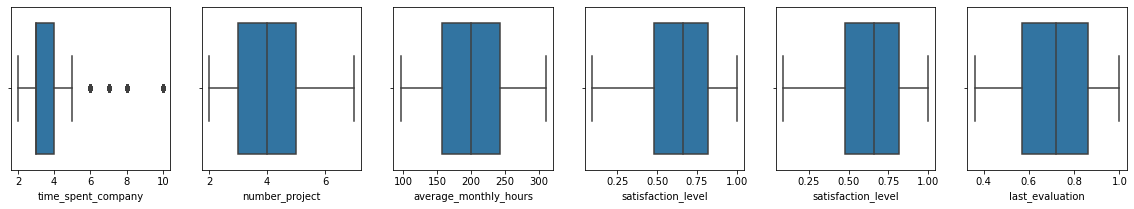

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,6, figsize=(20,3))
sns.boxplot(df1['time_spent_company'], ax=ax[0])
sns.boxplot(df1['number_project'], ax=ax[1])
sns.boxplot(df1['average_monthly_hours'], ax=ax[2])
sns.boxplot(df1['satisfaction_level'], ax=ax[3])
sns.boxplot(df1['satisfaction_level'], ax=ax[4])
sns.boxplot(df1['last_evaluation'], ax=ax[5]);

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df1[df1['time_spent_company']>5]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

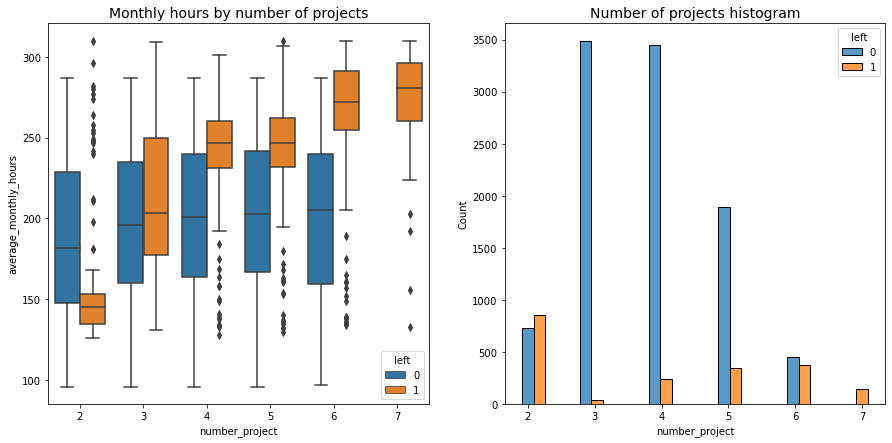

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize=(15,7))

#create a boxplot showing average monthly hours distributions for number of projects
sns.boxplot(data=df1, x='number_project', y='average_monthly_hours', hue='left', orient='v', ax=ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

#create a histogram showing distribution of number of projects for employees who have left and those still in the company
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

#display the plots
plt.show()

The charts above show that the number of hours worked increased with increasing number of projects. This is logical as more projects should lead to more hours. Also noted are the following key insights.

1. There are 2 main groups of employees who have left. One group, say A are those employees who left while having very few monthly hours. The other group, say B are those employees who left while having so many monthly hours and number of projects. Group A attrition is possibly due to not having enough satisfaction, motivation or renumeration on the job. Group B attrition could be due to the employee getting worn out from the amount of monthly hours of work. 

2. Employees with 7 number of projects are interesting in this analysis because all of them have left the company. This is perhaps also due to burnout.

3. Employees with 3, 4 or 5 projects seem to have considerable lesser attrition rate.


In [15]:
#showing the attrition of employees with 7 seven project
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This further shows all employees with 7 projects have left the company.

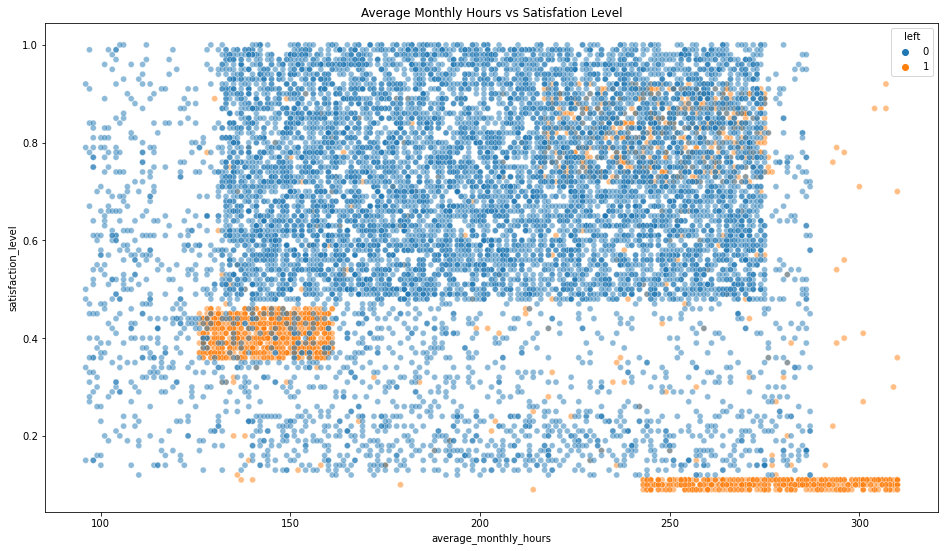

In [16]:
#a scatterplot of average monthly hours vs satisfaction level
plt.figure(figsize=(16,9))
plt.title('Average Monthly Hours vs Satisfation Level')
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)

The scatterplot shows that most of the employees with working hours between 140 to 220 hours have high satisfaction levels within 0.5 to 1.0. 

The chart also shows that a close knit of employees with working hours between 130 and 160  hours and with satisfaction level around 0.4 left the company. The close cluster as shown in the chart is indicative of employees with similar joib functions, perhaps they are in the same department. It could also be contract staff or interns. 

Also there is another cluster with employees who have worked between 240 to 320 hours. Most of those who have left in this cluster have satisfactiion levels of 0.1 and below. This group are most likely worn out from the number of hours worked and projects. 

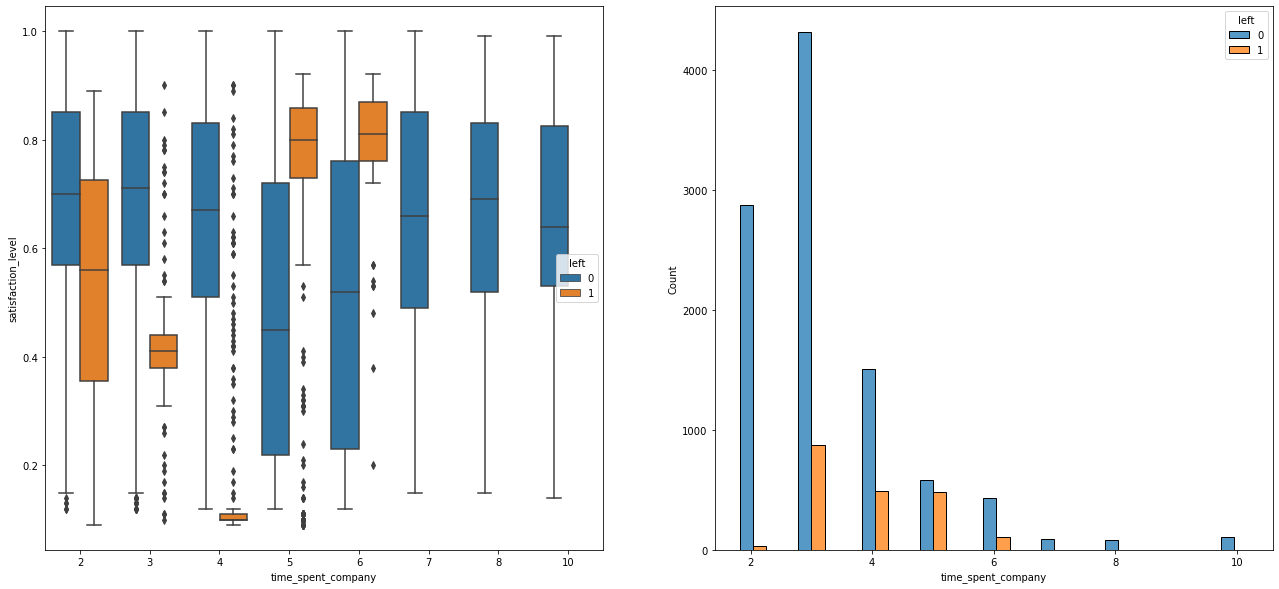

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1,2, figsize=(22,10))

sns.boxplot(data=df1, x='time_spent_company', y='satisfaction_level', hue='left', orient='v', ax=ax[0])
sns.histplot(data=df1, x='time_spent_company', multiple='dodge', hue='left', shrink=5, ax=ax[1])

The key insights from these charts are:
1. the satisfaction level of employees who left within the first 4 years of being with the company are very low compared to the satisfaction level of employees who left after 5 or 6 years. A reason for this is possibly that those with few years spent had contracts that were not satisfied with their jobs. Those who left after spending 5 years perhaps had ggod contracts and therefore were satisfied with their jobs. 
2. Employees who left after 4 years have a considerable low mean satisfaction level of about 0.1. This noticeable low satisfaction level should be further investigated. 
3. Employees who have stayed more than 6 years have  not left the company. Also their satisfation level is high (0.5 - 0.9) Only a few of these employees with over 6 years tenure are in the company. This is possibly due to the high attrition rates observed and also due to these employees being part of senior management. 

In [18]:
#average satisfaction level of employees who have left and those still with the company
emp_left_sl_grp = df1.groupby(['left'])[['satisfaction_level']].mean()
emp_left_sl_grp

,satisfaction_level
left,
0,0.667365
1,0.440271


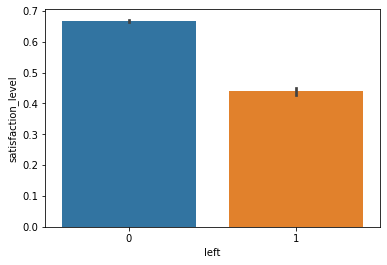

In [19]:
sns.barplot(data=df1, x='left', y='satisfaction_level');

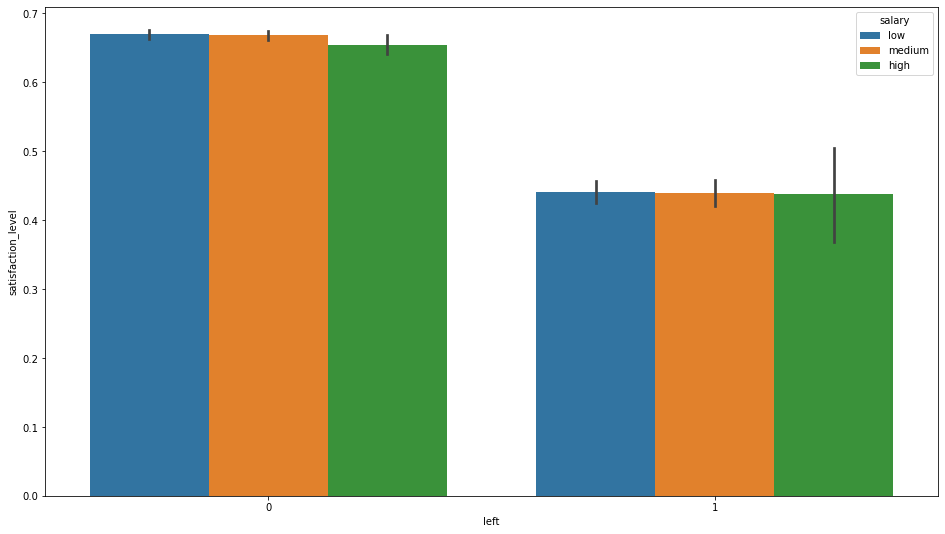

In [20]:
#investigating the salary of those who have left and those still in the company
plt.figure(figsize=(16,9))
sns.barplot(data=df1, x='left', y='satisfaction_level', hue='salary')

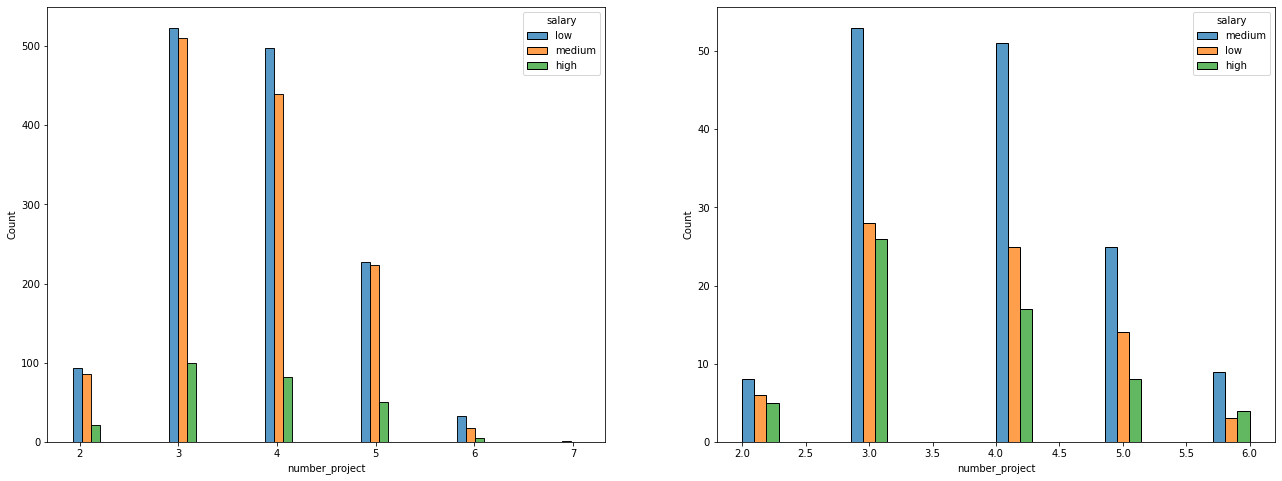

<Figure size 1152x648 with 0 Axes>

In [21]:
#investigating thenumber of projects of those who have left and those still in the company
fig, ax = plt.subplots(1,2, figsize=(22,8))

df_short_tenure = df1[df1['time_spent_company']<3]
df_long_tenure = df1[df1['time_spent_company']>6]

plt.figure(figsize=(16,9))
sns.histplot(data=df_short_tenure, x='number_project', hue='salary', multiple='dodge', shrink=2, ax=ax[0])
sns.histplot(data=df_long_tenure, x='number_project', hue='salary', multiple='dodge', ax=ax[1])

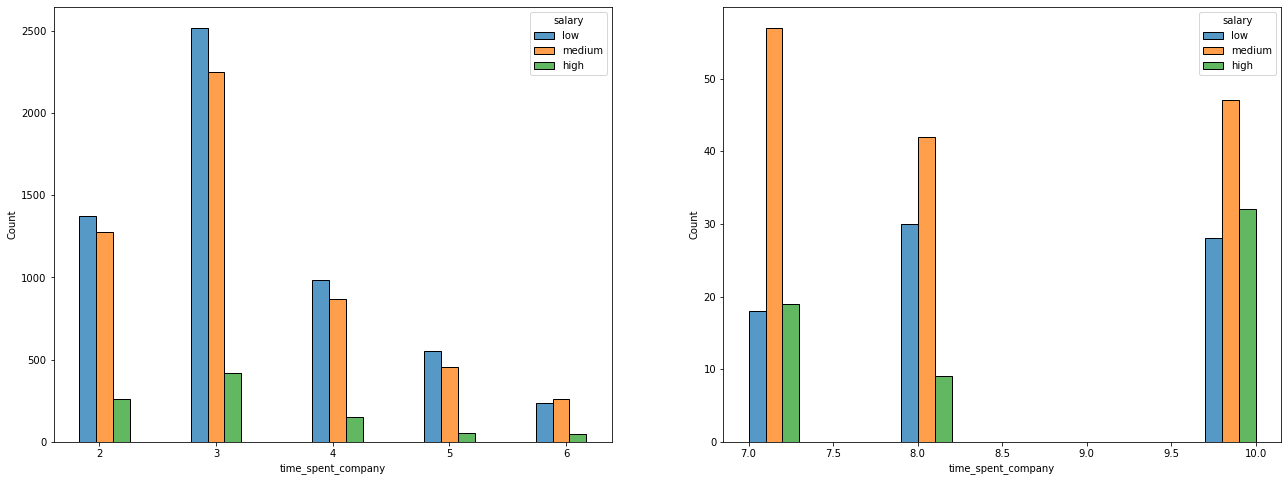

<Figure size 1152x648 with 0 Axes>

In [22]:
#investigating the tenure of those who have left and those still in the company
fig, ax = plt.subplots(1,2, figsize=(22,8))

df_short_tenure = df1[df1['time_spent_company']<7]
df_long_tenure = df1[df1['time_spent_company']>6]

plt.figure(figsize=(16,9))
sns.histplot(data=df_short_tenure, x='time_spent_company', hue='salary', multiple='dodge', shrink=5, hue_order=['low', 'medium', 'high'], ax=ax[0])
sns.histplot(data=df_long_tenure, x='time_spent_company', hue='salary', multiple='dodge', hue_order=['low', 'medium', 'high'], ax=ax[1])

The plots show that there is no significant difference between the salary distribution of employees who left and thos still in the company

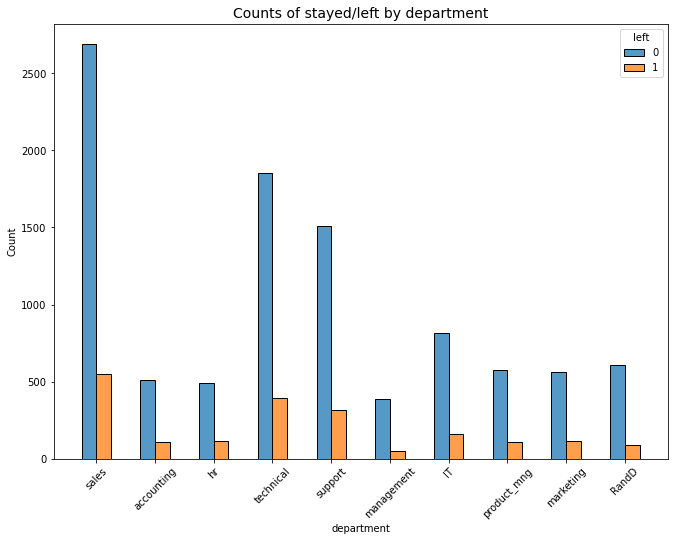

In [23]:
# Create a plot as needed 
### YOUR CODE HERE ###

# a histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


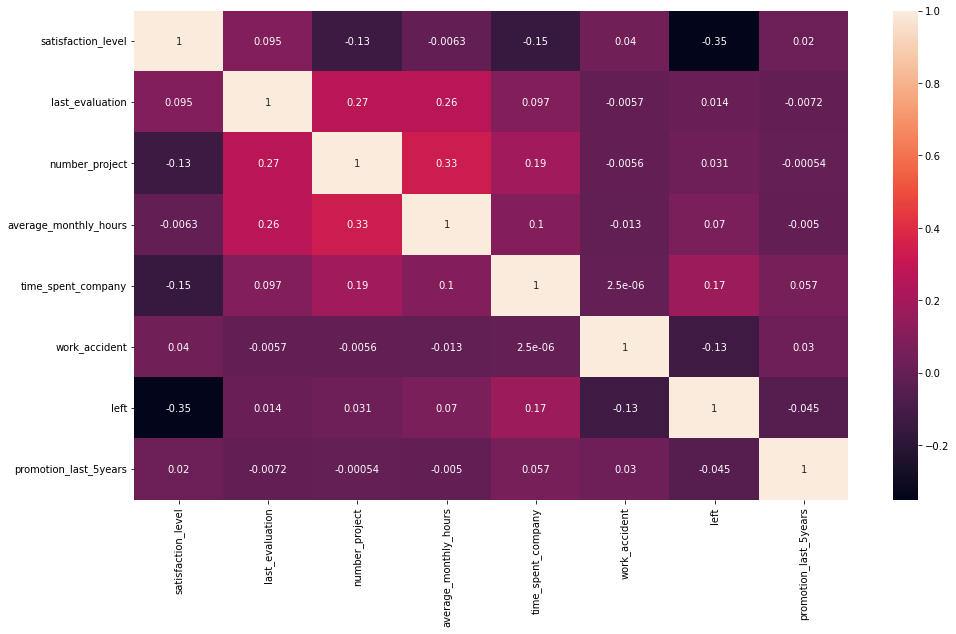

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(), annot=True);

The correlation heatmap shows that last evaluation, monthly hours, number of projects all have positive correlation with one another as well as with whether an employee as left the company. The satisfactiion level has a negative correlation with whether an employee has left.

### Insights

1. Employees with fewer work hours and perhaps lesser pay tend to leave the company

2. Employees who have stayed at the company for at least 6 years tend not to leave and generally have a good satisfaction level with the job.

3. Employees with monthly hours that are wayt above the average tend to be burned out which eleads to them leaving the company.

4. Employees with too many projects tend to the leave the company. The analysis shows that all employees who have taken on 7 projects (a maximum) have left the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task involves determining if an employee has left the company or not. This task is categorical hence a logistic regression model or tree based machine learning model will suffice. 

### Identify the types of models most appropriate for this task.

Random Forest

### Modeling

Add as many cells as you need to conduct the modeling process.

## Random Forest Model

In [25]:
df2 = df1.copy()
df2['salary'] = (df2['salary'].astype('category').cat.set_categories(['low', 'medium', 'high'])
                .cat.codes)
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spent_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   department_RandD        11991 non-null  uint8  
 9   department_accounting   11991 non-null  uint8  
 10  department_hr           11991 non-null  uint8  
 11  department_management   11991 non-null  uint8  
 12  department_marketing    11991 non-null  uint8  
 13  department_product_mng  11991 non-null  uint8  
 14  department_sales        11991 non-null

In [26]:
### YOUR CODE HERE ###
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

#split into X and y
X=df2.drop('left', axis=1)
y=df2['left']

#split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#instantiate random state classifier
rf = RandomForestClassifier(random_state=42)

#create a dictionary for the hyperparameters
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }
#create a diction of scoring meterics
scoring= {'accuracy', 'precision', 'recall', 'f1'}

#instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [27]:
%%time
rf1.fit(X_train,y_train)

CPU times: user 14 s, sys: 0 ns, total: 14 s
Wall time: 14 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [28]:
#examine best score
rf1.best_score_

0.9540590938503712

In [29]:
#examine the best combination of hyperparameters
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [30]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table 

In [31]:
# Call 'make_results()' on the GridSearch object
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.989988,0.920749,0.954059,0.985345


In [32]:
# Get scores on test data
preds = rf1.best_estimator_.predict(X_test)

In [33]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [34]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.989988,0.920749,0.954059,0.985345
0,RF test,0.978761,0.917081,0.946918,0.982768


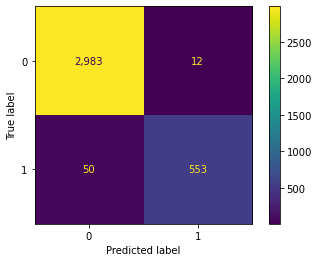

In [35]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format=',');

In [36]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [37]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 31 s, sys: 204 ms, total: 31.2 s
Wall time: 15.7 s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                   

In [38]:
xgb1.best_score_

0.9431656149796824

In [39]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [40]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.989988,0.920749,0.954059,0.985345
0,RF test,0.978761,0.917081,0.946918,0.982768
0,XGB CV,0.967633,0.920029,0.943166,0.981651


In [41]:
# Get scores on test data
preds = xgb1.best_estimator_.predict(X_test)

In [42]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.989988,0.920749,0.954059,0.985345
0,RF test,0.978761,0.917081,0.946918,0.982768
0,XGB CV,0.967633,0.920029,0.943166,0.981651
0,XGB test,0.968254,0.910448,0.938462,0.979989


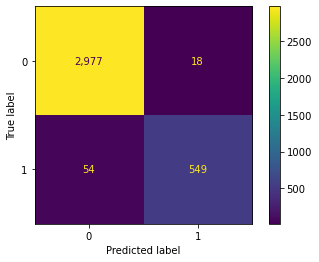

In [43]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_)
disp.plot(values_format=',');

Overall the model has a great performance in terms of recall, accuracy, precision and f1 score. 

The model predicts 18 false positives and 54 true negatives. 

A false positive is when the model predicts the employee to leave and the employee stays.
A true negative is when the model predicts the employee to stay but the employee leaves. 

A false positive is less desirable for the affected employees because the model has wrongly predicted them to leave and this can make the company take actions to gradually ease these employees from more productive work.

A true negative is less desirable for the company as the company may invest more resources in such individuals only to end up losing them. 



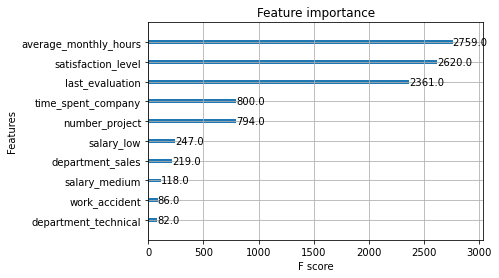

In [44]:
plot_importance(xgb1.best_estimator_, max_num_features=10);

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?

The model is a great model as shown in the parameter scores
- What business recommendations do you propose based on the models built?

The company should look into the satisfaction level of the empoloyees, try to know the reasons for the poor satisfaction and work to inmprove it.  Also, the company should not overwork its employees as this was shown to perhaps be one of the reasons for attrition. 
- What potential recommendations would you make to your manager/company?

I would recommend that the manager evaluates his workers more frequently, reduce work hours especially for new employees and also train them on their weak points
- Do you think your model could be improved? Why or why not? How?

The model performance can be improved by adding more variables such as reasons for leaving.
- Given what you know about the data and the models you were using, what other questions could you address for the team?

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

Python

- Do you have any ethical considerations in this stage?

The employees identity should be anonymous so as to not lead to a case of bias towards employees that the model predicts will leave the company


Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The random forest model achieved a good performance both on the training and test data. With the XGBoost Classifier, there was no improvement on the model but overall, the performance was still great.

The random forest on the training data achieved a precision score of 99.00%, recall of 92.07%, f1 score of 95.41% and an accuracy of 98.53%.


The random forest on the test data achieved a precision score of 97.88%, recall of 91.71%, f1 score of 94.69% and an accuracy of 98.28%.

The XGBoost Classifier on the training data achieved a precision score of 96.76%, recall of 92.00%, f1 score of 94.32% and an accuracy of 98.17%.

The XGBoost Classifier on the test data achieved a precision score of 96.83%, recall of 91.04%, f1 score of 93.85% and an accuracy of 98.00%.



### Conclusion, Recommendations, Next Steps

The Analysis shows that a lot of the workers are overworked. To reduce attrition, the company should consider the following:
1. Reduce the number of projects for each employee with 5 being the maximum for any employee at any time.
2. The monthly hours of the employees should be reduced in order to avoid burn out for the employees.
3. An onboarding program to ease new employees into the company. These new employees should not be burdened with too many hours nor too many projects.
4. Reward employees via improved remuneration, vacation leave, promotion etc.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.